<a href="https://colab.research.google.com/github/aayush1036/algorithm_trading_course/blob/master/Efficient_frontier/Efficient_frontier_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload 
%autoreload 2
%matplotlib inline 
import edhec_risk_kit as erk 
import pandas as pd
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind['1996':'2000'], 12)
cov = ind['1996':'2000'].cov()

In [16]:
def plot_ef2(n_points, er, cov, style='.-'):
    """
    Plots the 2-asset efficient frontier 
    """
    weights = minimize_vol(target_return)
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({'Returns':rets, 'Volatility':vols})
    return ef.plot.line(x='Volatility', y='Returns', style = style)

In [17]:
from scipy.optimize import minimize

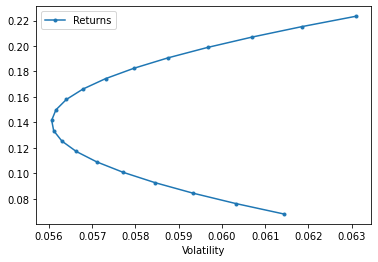

In [18]:
l = ['Games', 'Fin']
erk.plot_ef2(20, er[l], cov.loc[l,l])

In [29]:
import numpy as np
from scipy.optimize import minimize

def minimize_vol(target_return, er, cov):
    """
    Returns the optimal weights that achieve the target return
    given a set of expected returns and a covariance matrix
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    return_is_target = {'type': 'eq',
                        'args': (er,),
                        'fun': lambda weights, er: target_return - erk.portfolio_return(weights,er)
    }
    weights = minimize(erk.portfolio_vol, init_guess,
                       args=(cov,), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,return_is_target),
                       bounds=bounds)
    return weights.x

In [36]:
w15 = erk.minimize_vol(0.15, er[l], cov.loc[l,l])
vol15 = erk.portfolio_vol(w15, cov.loc[l,l])
vol15

0.056163669406706564

In [37]:
w15

array([0.47287631, 0.52712369])

In [43]:
def optimal_weights(n_points, er, cov):
    """
    -> list of weights to run the optimizer 
    """
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights
def plot_ef(n_points, er, cov):
    """
    Plots the multi-asset efficient frontier
    """
    weights = optimal_weights(n_points, er, cov)
    rets = [erk.portfolio_return(w, er) for w in weights]
    vols = [erk.portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    return ef.plot.line(x="Volatility", y="Returns", style='.-', legend=False)

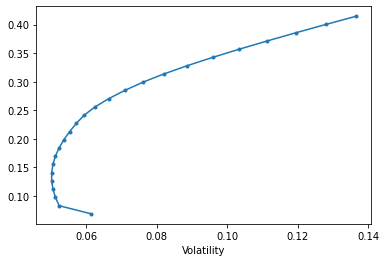

In [46]:
l = ['Smoke', 'Fin', 'Games', 'Coal']
erk.plot_ef(25, er[l], cov.loc[l,l])